In [3]:
!pip install pandas
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering


# Objetivo: importar bibliotecas essenciais para an√°lise, visualiza√ß√£o e normaliza√ß√£o dos dados.


In [5]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 
                'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 
                'ShellWeight', 'Rings']

df = pd.read_csv("abalone.data", header=None, names=column_names)

# Carregamos o arquivo `abalone.data` com nomes de colunas definidos manualmente

In [6]:
df.head()


Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe()

Length     Diameter       Height  WholeWeight  ShuckedWeight  \
count  4177.000000  4177.000000  4177.000000  4177.000000    4177.000000   
mean      0.523992     0.407881     0.139516     0.828742       0.359367   
std       0.120093     0.099240     0.041827     0.490389       0.221963   
min       0.075000     0.055000     0.000000     0.002000       0.001000   
25%       0.450000     0.350000     0.115000     0.441500       0.186000   
50%       0.545000     0.425000     0.140000     0.799500       0.336000   
75%       0.615000     0.480000     0.165000     1.153000       0.502000   
max       0.815000     0.650000     1.130000     2.825500       1.488000   

       VisceraWeight  ShellWeight        Rings  
count    4177.000000  4177.000000  4177.000000  
mean        0.180594     0.238831     9.933684  
std         0.109614     0.139203     3.224169  
min         0.000500     0.001500     1.000000  
25%         0.093500     0.130000     8.000000  
50%         0.171000     0.234000     9.000000  
75%         0.253000     0.329000    11.000000  
max         0.760000     1.005000    29.000000

In [9]:
df.isnull().sum()

# Confirmamos que n√£o h√° valores nulos no dataset (como esperado)


Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


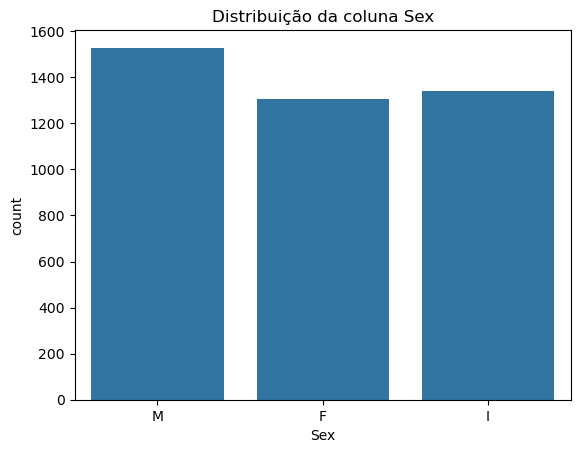

In [10]:
print(df['Sex'].value_counts())

sns.countplot(x='Sex', data=df)
plt.title('Distribui√ß√£o da coluna Sex')
plt.show()

# √ötil para visualizar distribui√ß√£o das categorias M, F e I (infant)


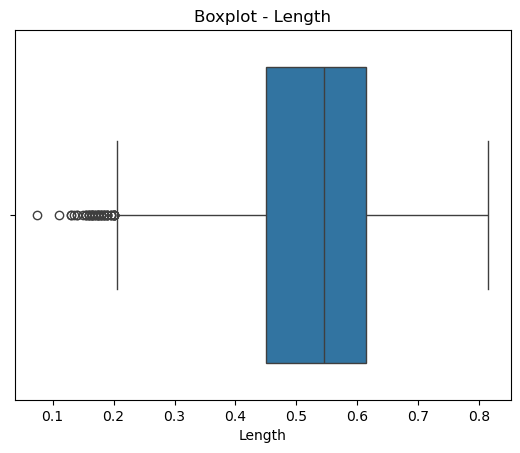

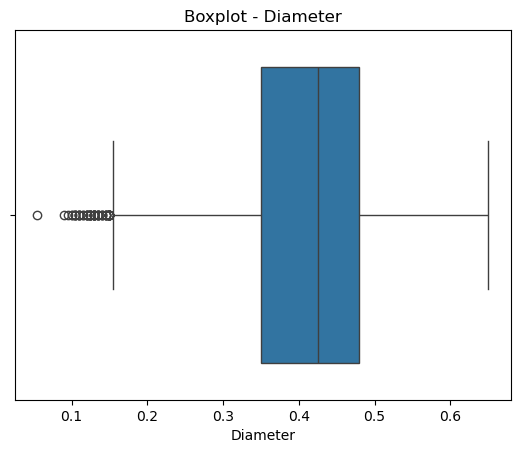

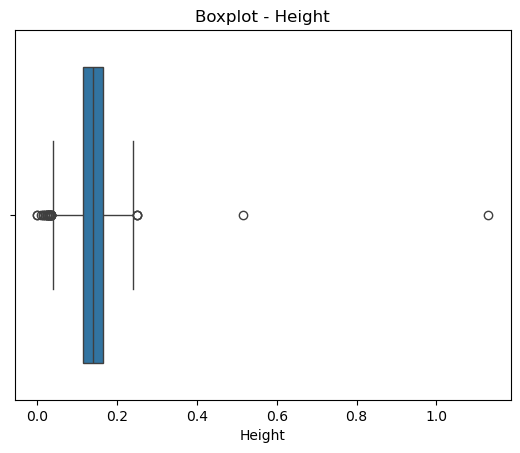

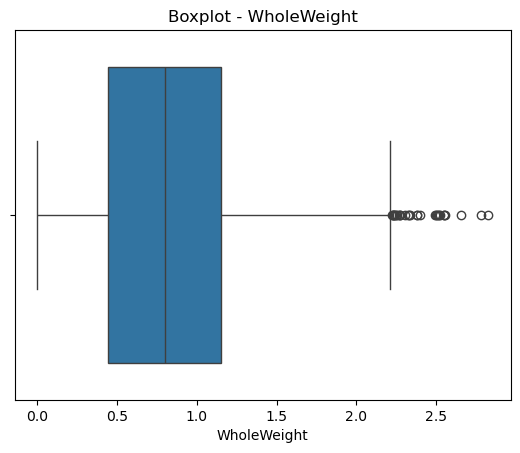

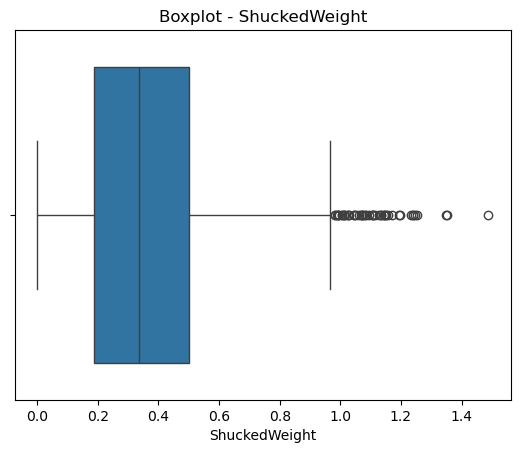

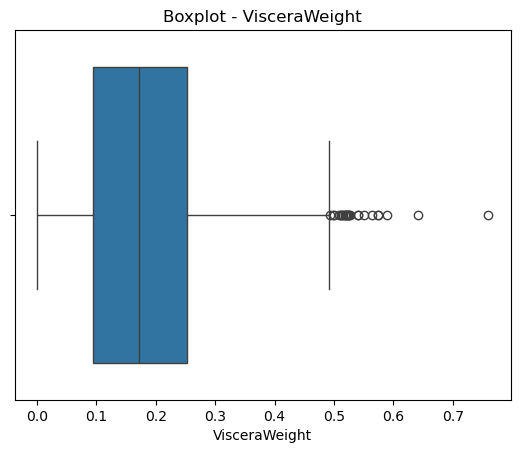

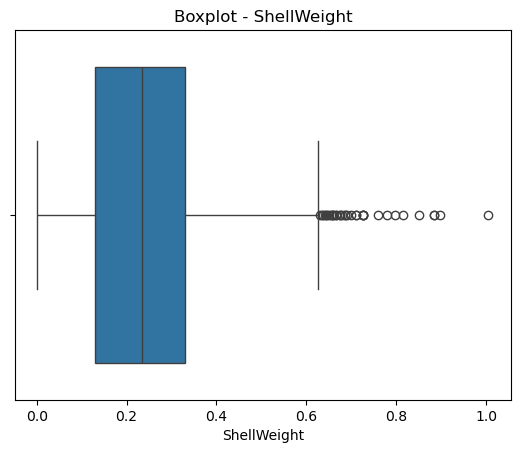

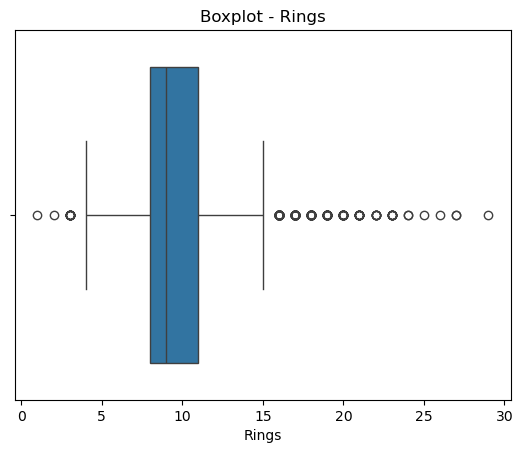

In [11]:
num_features = df.columns[1:]  # excluindo 'Sex'

for col in num_features:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


In [12]:
df_clean = df.copy()

numeric_features = ['Length', 'Diameter', 'Height', 
                'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 
                'ShellWeight',]
categorical_features = ['Sex']




In [13]:
def remove_outliers_iqr_corrigido(df, columns):
    df_out = df.copy()

    limites = {}
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        limites[col] = (limite_inferior, limite_superior)

    # Uma linha √© mantida se TODOS os seus valores estiverem dentro dos respectivos limites.
    mascara_outliers = pd.Series([True] * len(df_out), index=df_out.index)
    for col in columns:
        lim_inf, lim_sup = limites[col]
        mascara_outliers &= (df_out[col] >= lim_inf) & (df_out[col] <= lim_sup)

    return df_out[mascara_outliers]

print(f"Tamanho original do DataFrame: {df.shape}")
df_clean = remove_outliers_iqr_corrigido(df_clean, numeric_features)
print(f"Tamanho do DataFrame ap√≥s remo√ß√£o de outliers: {df_clean.shape}")

Tamanho original do DataFrame: (4177, 9)
Tamanho do DataFrame ap√≥s remo√ß√£o de outliers: (4024, 9)


In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
)

df_for_transforming = df_clean[numeric_features+categorical_features]

X_processed = preprocessor.fit_transform(df_for_transforming)

new_columns = preprocessor.get_feature_names_out()

df_processed_scaled = pd.DataFrame(X_processed, columns=new_columns)

new_columns_with_prefix = preprocessor.get_feature_names_out()

cleaned_columns = [col.split('__')[1] for col in new_columns_with_prefix]

df_processed_scaled = pd.DataFrame(X_processed, columns=cleaned_columns)

df_processed_scaled.head()


Length  Diameter   Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0 -0.632245 -0.474574 -1.23997    -0.666150      -0.631483      -0.753592   
1 -1.580579 -1.562434 -1.38003    -1.310363      -1.251442      -1.270933   
2  0.045136  0.123750 -0.11949    -0.302174      -0.472773      -0.354500   
3 -0.767721 -0.474574 -0.39961    -0.661684      -0.676120      -0.625488   
4 -1.761214 -1.671220 -1.66015    -1.356139      -1.301038      -1.359620   

   ShellWeight  Sex_F  Sex_I  Sex_M  
0    -0.665126    0.0    0.0    1.0  
1    -1.296032    0.0    0.0    1.0  
2    -0.191946    1.0    0.0    0.0  
3    -0.625694    0.0    0.0    1.0  
4    -1.414327    0.0    1.0    0.0

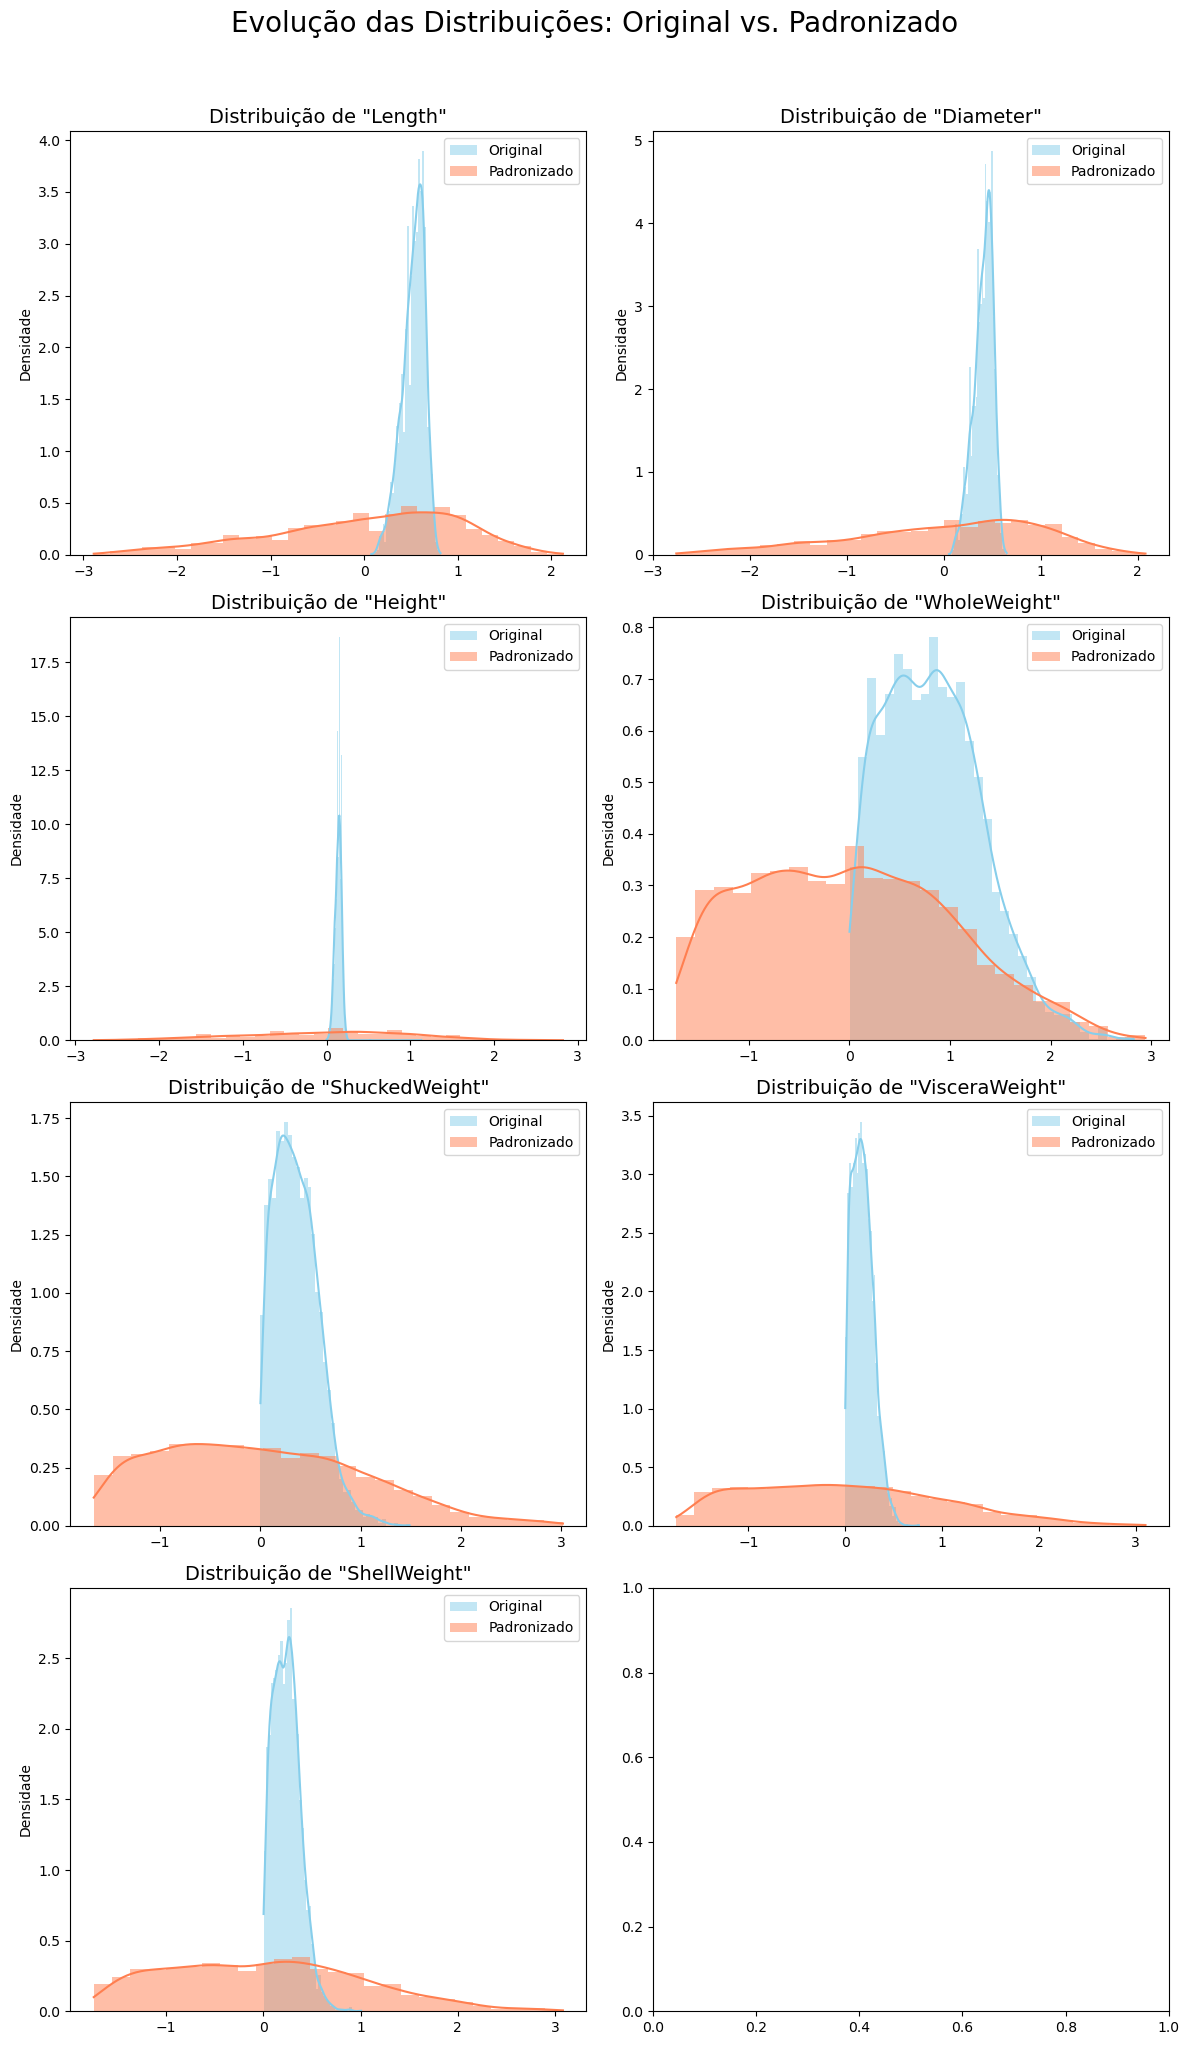

In [15]:
n_features = len(numeric_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(data=df, x=feature, color="skyblue", label='Original', kde=True, ax=ax, stat="density", linewidth=0)
    sns.histplot(data=df_processed_scaled, x=feature, color="coral", label='Padronizado', kde=True, ax=ax, stat="density", linewidth=0)
    ax.set_title(f'Distribui√ß√£o de "{feature}"', fontsize=14)
    ax.legend()
    ax.set_xlabel('')
    ax.set_ylabel('Densidade')

fig.suptitle('Evolu√ß√£o das Distribui√ß√µes: Original vs. Padronizado', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

/home/joabemorais/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


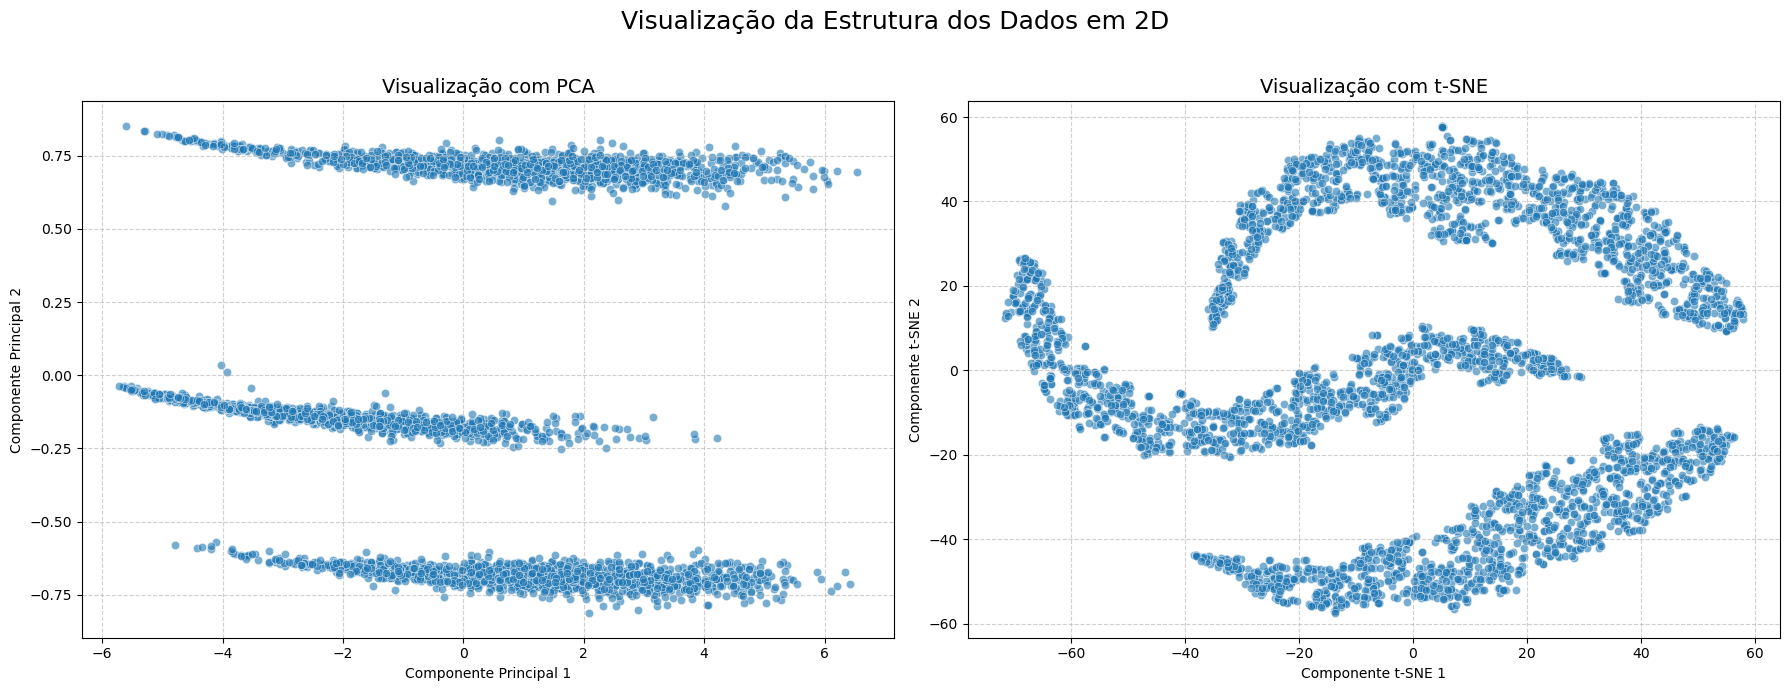

In [16]:
pca = PCA(n_components=2, random_state=42)
coordenadas_pca = pca.fit_transform(df_processed_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
coordenadas_tsne = tsne.fit_transform(df_processed_scaled)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

fig.suptitle('Visualiza√ß√£o da Estrutura dos Dados em 2D', fontsize=18)

#PCA
sns.scatterplot(x=coordenadas_pca[:, 0], y=coordenadas_pca[:, 1], ax=axes[0], alpha=0.6)
axes[0].set_title('Visualiza√ß√£o com PCA', fontsize=14)
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].grid(True, linestyle='--', alpha=0.6)

#t-SNE
sns.scatterplot(x=coordenadas_tsne[:, 0], y=coordenadas_tsne[:, 1], ax=axes[1], alpha=0.6)
axes[1].set_title('Visualiza√ß√£o com t-SNE', fontsize=14)
axes[1].set_xlabel('Componente t-SNE 1')
axes[1].set_ylabel('Componente t-SNE 2')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

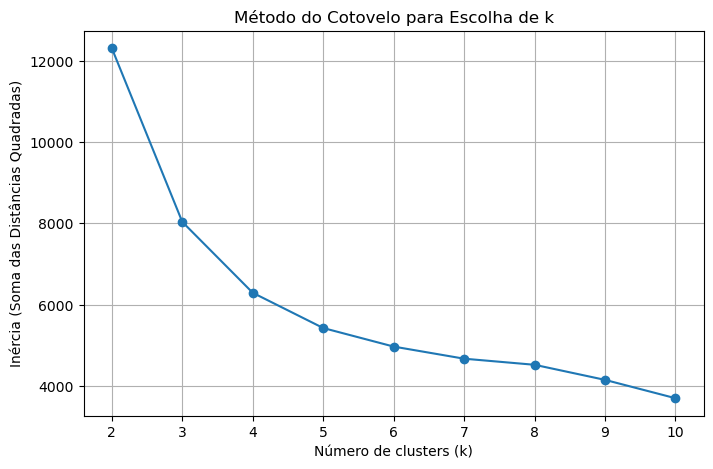

In [17]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_processed_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('In√©rcia (Soma das Dist√¢ncias Quadradas)')
plt.title('M√©todo do Cotovelo para Escolha de k')
plt.grid(True)
plt.show()

# Justificativa:
# A "in√©rcia" mede qu√£o compactos est√£o os clusters. O "cotovelo" indica onde a melhoria se estabiliza.


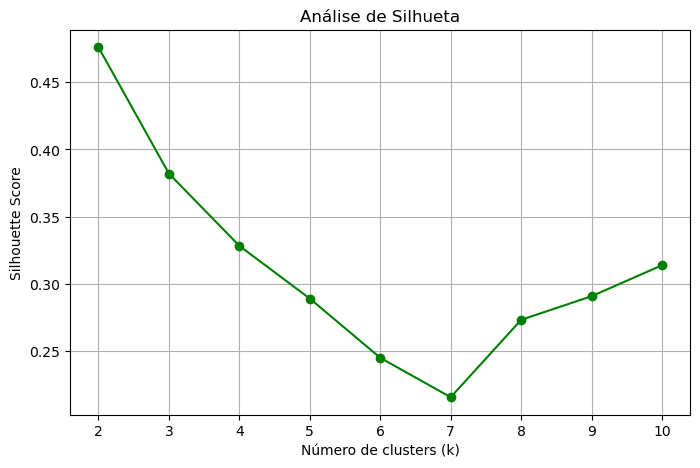

In [18]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_processed_scaled)
    score = silhouette_score(df_processed_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('An√°lise de Silhueta')
plt.grid(True)
plt.show()

# Justificativa:
# O Silhouette Score varia de -1 a 1 e mede a coes√£o e separa√ß√£o dos clusters.
# Quanto mais pr√≥ximo de 1, melhor os clusters est√£o definidos.


In [19]:
best_k = 3  # (substituir com o valor ideal ap√≥s an√°lise do gr√°fico)
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_processed_scaled)
centroids = kmeans.cluster_centers_



In [20]:
sil_score_kmeans = silhouette_score(df_processed_scaled, labels)
db_score_kmeans = davies_bouldin_score(df_processed_scaled, labels)
ch_score_kmeans = calinski_harabasz_score(df_processed_scaled, labels)

print(f"Silhouette Score: {sil_score_kmeans:.3f}")
print(f"Davies-Bouldin Score: {db_score_kmeans:.3f}")
print(f"Calinski-Harabasz Score: {ch_score_kmeans:.3f}")

# Interpreta√ß√£o:
# - Silhouette: quanto maior, melhor (idealmente > 0.5)
# - Davies-Bouldin: quanto menor, melhor
# - Calinski-Harabasz: quanto maior, melhor


Silhouette Score: 0.382
Davies-Bouldin Score: 0.887
Calinski-Harabasz Score: 5706.627


/home/joabemorais/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


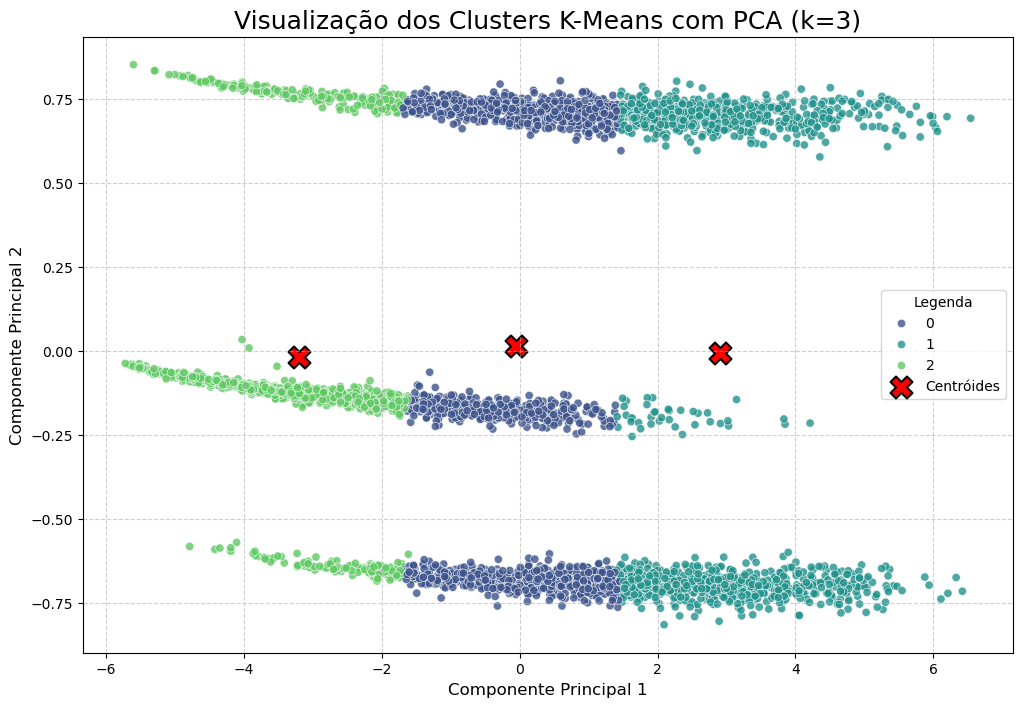

In [21]:
df_plot_pca = pd.DataFrame()
df_plot_pca['PCA1'] = coordenadas_pca[:, 0]
df_plot_pca['PCA2'] = coordenadas_pca[:, 1]
df_plot_pca['Cluster'] = pd.Categorical(kmeans.labels_)

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_plot_pca,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    alpha=0.8,
)

centroids_pca = pca.transform(centroids)

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=250,
    c='red',
    edgecolor='black',
    linewidth=1.5,
    label='Centr√≥ides'
)

plt.title('Visualiza√ß√£o dos Clusters K-Means com PCA (k=3)', fontsize=18)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Legenda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Clusteriza√ß√£o Espacial Baseada em Densidade (DBSCAN)

Vamos agrupar os dados com base na densidade, encontrando assim, clusters de formatos irregulares e identificando outliers.

Mas antes, vamos importar as bibliotecas necess√°rias e preparar os dados. Garantindo que vamos usar o conjunto de dados completo e aplicar o mesmo pr√©-processamento de escalonamento (StandardScaler) e codifica√ß√£o (OneHotEncoder) usado anteriormente.

## Determinando os hiperpar√¢metros do DBSCAN

Valor de min_samples (2 * D): 20


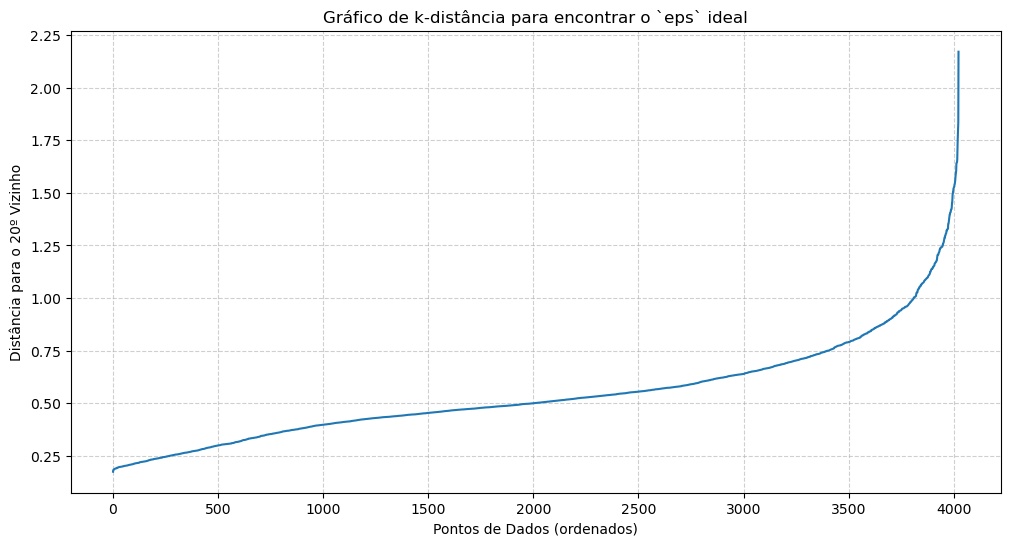

In [22]:
# 1. Definindo min_samples
D = df_processed_scaled.shape[1]
min_samples = 2*D
print(f"Valor de min_samples (2 * D): {min_samples}")

# 2. Encontrando o eps ideal com o gr√°fico de k-dist√¢ncia
k = min_samples
neighbors = NearestNeighbors(n_neighbors=k).fit(df_processed_scaled)
distances, indices = neighbors.kneighbors(df_processed_scaled)
k_distances = np.sort(distances[:, k-1], axis=0)

# Plotando o gr√°fico
plt.figure(figsize=(12, 6))
plt.plot(k_distances)
plt.title('Gr√°fico de k-dist√¢ncia para encontrar o `eps` ideal')
plt.xlabel('Pontos de Dados (ordenados)')
plt.ylabel(f'Dist√¢ncia para o {k}¬∫ Vizinho')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [23]:
# Com base no gr√°fico, um valor em torno de 1.4 parece ser o ponto de cotovelo.
eps_escolhido = 1.2
print(f"\nValor de `eps` escolhido a partir do gr√°fico: {eps_escolhido}")


Valor de `eps` escolhido a partir do gr√°fico: 1.2


## Treinamento e An√°lise do Modelo DBSCAN

In [24]:
# Instanciando e treinando o modelo DBSCAN
dbscan = DBSCAN(eps=eps_escolhido, min_samples=min_samples)
clusters_dbscan = dbscan.fit_predict(df_processed_scaled)

# Analisando os resultados
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print(f"N√∫mero de clusters encontrados: {n_clusters}")
print(f"N√∫mero de pontos de ru√≠do (outliers): {n_noise}")
print("\nContagem de pontos por cluster:")
print(pd.Series(clusters_dbscan).value_counts())

N√∫mero de clusters encontrados: 3
N√∫mero de pontos de ru√≠do (outliers): 10

Contagem de pontos por cluster:
 0    1464
 2    1282
 1    1268
-1      10
Name: count, dtype: int64


## Avalia√ß√£o e Visualiza√ß√£o dos Clusters

In [25]:
core_points_mask = clusters_dbscan != -1 #Excluindo o ru√≠do para calcular as m√©tricas
labels_core_points = clusters_dbscan[core_points_mask]
data_core_points = df_processed_scaled[core_points_mask]

sil_score_dbscan = silhouette_score(data_core_points, labels_core_points)
db_score_dbscan = davies_bouldin_score(data_core_points, labels_core_points)
ch_score_dbscan = calinski_harabasz_score(data_core_points, labels_core_points)

print(f"\nM√©tricas de Avalia√ß√£o do DBSCAN:")
print(f"Silhouette Score: {sil_score_dbscan:.4f}")
print(f"Davies-Bouldin Score: {db_score_dbscan:.4f}")
print(f"Calinski-Harabasz Score: {ch_score_dbscan:.2f}")

# Interpreta√ß√£o das m√©tricas DBSCAN:
print("\n=== INTERPRETA√á√ÉO DOS RESULTADOS DBSCAN ===")
print(f"‚Ä¢ Silhouette Score ({sil_score_dbscan:.4f}): {'Baixo - clusters pouco definidos' if sil_score_dbscan < 0.3 else 'Moderado - clusters razoavelmente definidos' if sil_score_dbscan < 0.5 else 'Alto - clusters bem definidos'}")
print(f"‚Ä¢ Davies-Bouldin Score ({db_score_dbscan:.4f}): {'Alto - clusters sobrepostos' if db_score_dbscan > 1.5 else 'Moderado - separa√ß√£o razo√°vel' if db_score_dbscan > 1.0 else 'Baixo - boa separa√ß√£o'}")
print(f"‚Ä¢ Calinski-Harabasz Score ({ch_score_dbscan:.2f}): {'Baixo - clusters mal definidos' if ch_score_dbscan < 1000 else 'Moderado - defini√ß√£o razo√°vel' if ch_score_dbscan < 3000 else 'Alto - clusters bem definidos'}")

# Compara√ß√£o com K-means
print("\n=== COMPARA√á√ÉO DBSCAN vs K-MEANS ===")
print(f"Silhouette Score: DBSCAN ({sil_score_dbscan:.4f}) vs K-means ({sil_score_kmeans:.3f})")
print(f"Davies-Bouldin Score: DBSCAN ({db_score_dbscan:.4f}) vs K-means ({db_score_kmeans:.3f})")
print(f"Calinski-Harabasz Score: DBSCAN ({ch_score_dbscan:.2f}) vs K-means ({ch_score_kmeans:.3f})")

if sil_score_dbscan > sil_score_kmeans:
    print("‚Üí DBSCAN apresenta melhor coes√£o e separa√ß√£o dos clusters")
else:
    print("‚Üí K-means apresenta melhor coes√£o e separa√ß√£o dos clusters")


M√©tricas de Avalia√ß√£o do DBSCAN:
Silhouette Score: 0.1667
Davies-Bouldin Score: 2.1691
Calinski-Harabasz Score: 1167.07

=== INTERPRETA√á√ÉO DOS RESULTADOS DBSCAN ===
‚Ä¢ Silhouette Score (0.1667): Baixo - clusters pouco definidos
‚Ä¢ Davies-Bouldin Score (2.1691): Alto - clusters sobrepostos
‚Ä¢ Calinski-Harabasz Score (1167.07): Moderado - defini√ß√£o razo√°vel

=== COMPARA√á√ÉO DBSCAN vs K-MEANS ===
Silhouette Score: DBSCAN (0.1667) vs K-means (0.382)
Davies-Bouldin Score: DBSCAN (2.1691) vs K-means (0.887)
Calinski-Harabasz Score: DBSCAN (1167.07) vs K-means (5706.627)
‚Üí K-means apresenta melhor coes√£o e separa√ß√£o dos clusters


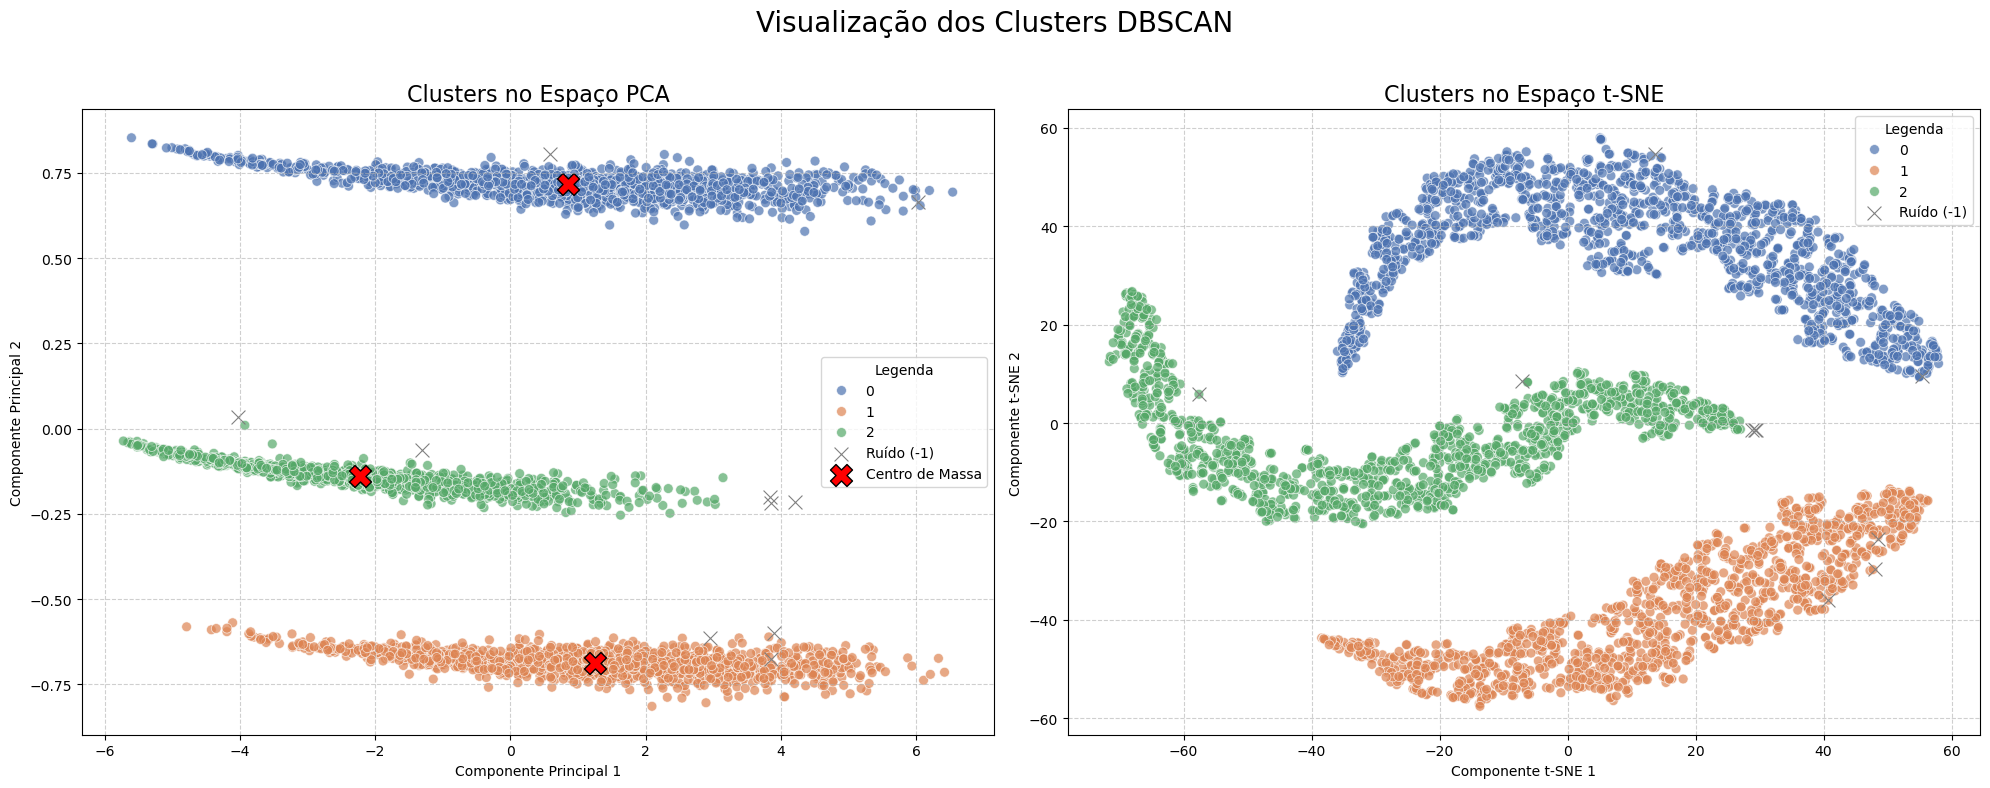

In [ ]:
df_plot_dbscan = pd.DataFrame()
df_plot_dbscan['PCA1'] = coordenadas_pca[:, 0]
df_plot_dbscan['PCA2'] = coordenadas_pca[:, 1]
df_plot_dbscan['TSNE1'] = coordenadas_tsne[:, 0]
df_plot_dbscan['TSNE2'] = coordenadas_tsne[:, 1]
df_plot_dbscan['Cluster'] = clusters_dbscan

df_clusters = df_plot_dbscan[df_plot_dbscan['Cluster'] != -1]
df_noise = df_plot_dbscan[df_plot_dbscan['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Visualiza√ß√£o dos Clusters DBSCAN', fontsize=20)

ax_pca = axes[0]
sns.scatterplot(
    data=df_clusters, x='PCA1', y='PCA2', hue='Cluster',
    palette='deep', ax=ax_pca, s=50, alpha=0.7
)
sns.scatterplot(
    data=df_noise, x='PCA1', y='PCA2', color='gray',
    marker='x', s=100, ax=ax_pca, label='Ru√≠do (-1)'
)

# Centroides
centroids_pca = df_clusters.groupby('Cluster')[['PCA1', 'PCA2']].mean()
ax_pca.scatter(
    centroids_pca['PCA1'], centroids_pca['PCA2'],
    marker='X', s=250, c='red', edgecolor='black', label='Centro de Massa'
)
ax_pca.set_title('Clusters no Espa√ßo PCA', fontsize=16)
ax_pca.set_xlabel('Componente Principal 1')
ax_pca.set_ylabel('Componente Principal 2')
ax_pca.legend(title='Legenda')
ax_pca.grid(True, linestyle='--', alpha=0.6)

# --- Gr√°fico da Direita: t-SNE ---
ax_tsne = axes[1]
sns.scatterplot(
    data=df_clusters, x='TSNE1', y='TSNE2', hue='Cluster',
    palette='deep', ax=ax_tsne, s=50, alpha=0.7
)
sns.scatterplot(
    data=df_noise, x='TSNE1', y='TSNE2', color='gray',
    marker='x', s=100, ax=ax_tsne, label='Ru√≠do (-1)'
)
ax_tsne.set_title('Clusters no Espa√ßo t-SNE', fontsize=16)
ax_tsne.set_xlabel('Componente t-SNE 1')
ax_tsne.set_ylabel('Componente t-SNE 2')
ax_tsne.legend(title='Legenda')
ax_tsne.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Compara√ß√£o visual side-by-side: K-means vs DBSCAN
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Compara√ß√£o Completa: K-means vs DBSCAN (PCA e t-SNE)', fontsize=20, y=0.98)

# Subplot 1: K-means com PCA
axes[0,0].scatter(coordenadas_pca[:, 0], coordenadas_pca[:, 1], 
                 c=labels, cmap='viridis', alpha=0.7, s=30)
# Calculando centr√≥ides no espa√ßo PCA para K-means
for i in range(best_k):
    mask = labels == i
    centroid_x = np.mean(coordenadas_pca[mask, 0])
    centroid_y = np.mean(coordenadas_pca[mask, 1])
    axes[0,0].scatter(centroid_x, centroid_y, marker='X', s=200, c='red', 
                     edgecolor='black', linewidth=2)
axes[0,0].set_title('K-means com PCA', fontsize=14)
axes[0,0].set_xlabel('Componente Principal 1')
axes[0,0].set_ylabel('Componente Principal 2')
axes[0,0].grid(True, linestyle='--', alpha=0.6)

# Subplot 2: K-means com t-SNE
axes[0,1].scatter(coordenadas_tsne[:, 0], coordenadas_tsne[:, 1], 
                 c=labels, cmap='viridis', alpha=0.7, s=30)
axes[0,1].set_title('K-means com t-SNE', fontsize=14)
axes[0,1].set_xlabel('Componente t-SNE 1')
axes[0,1].set_ylabel('Componente t-SNE 2')
axes[0,1].grid(True, linestyle='--', alpha=0.6)

# Subplot 3: DBSCAN com PCA
unique_labels = sorted(set(clusters_dbscan))
colors = ['red' if label == -1 else plt.cm.viridis(i/len([l for l in unique_labels if l != -1])) 
          for i, label in enumerate(unique_labels)]
color_map = dict(zip(unique_labels, colors))

for label in unique_labels:
    mask = clusters_dbscan == label
    if label == -1:
        axes[1,0].scatter(coordenadas_pca[mask, 0], coordenadas_pca[mask, 1], 
                         c='red', marker='x', s=50, alpha=0.8, label='Outliers')
    else:
        axes[1,0].scatter(coordenadas_pca[mask, 0], coordenadas_pca[mask, 1], 
                         c=[color_map[label]], alpha=0.7, s=30, label=f'Cluster {label}')
        # Centr√≥ide para clusters v√°lidos
        centroid_x = np.mean(coordenadas_pca[mask, 0])
        centroid_y = np.mean(coordenadas_pca[mask, 1])
        axes[1,0].scatter(centroid_x, centroid_y, marker='X', s=200, c='black', 
                         edgecolor='white', linewidth=2)

axes[1,0].set_title('DBSCAN com PCA', fontsize=14)
axes[1,0].set_xlabel('Componente Principal 1')
axes[1,0].set_ylabel('Componente Principal 2')
axes[1,0].grid(True, linestyle='--', alpha=0.6)

# Subplot 4: DBSCAN com t-SNE
for label in unique_labels:
    mask = clusters_dbscan == label
    if label == -1:
        axes[1,1].scatter(coordenadas_tsne[mask, 0], coordenadas_tsne[mask, 1], 
                         c='red', marker='x', s=50, alpha=0.8, label='Outliers')
    else:
        axes[1,1].scatter(coordenadas_tsne[mask, 0], coordenadas_tsne[mask, 1], 
                         c=[color_map[label]], alpha=0.7, s=30, label=f'Cluster {label}')

axes[1,1].set_title('DBSCAN com t-SNE', fontsize=14)
axes[1,1].set_xlabel('Componente t-SNE 1')
axes[1,1].set_ylabel('Componente t-SNE 2')
axes[1,1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Resumo comparativo quantitativo
print("\n" + "="*70)
print("                    RESUMO COMPARATIVO FINAL")
print("="*70)
print(f"{'M√©trica':<25} {'K-means':<15} {'DBSCAN':<15} {'Melhor':<15}")
print("-"*70)
print(f"{'Silhouette Score':<25} {sil_score_kmeans:<15.4f} {sil_score_dbscan:<15.4f} {'K-means' if sil_score_kmeans > sil_score_dbscan else 'DBSCAN':<15}")
print(f"{'Davies-Bouldin Score':<25} {db_score_kmeans:<15.4f} {db_score_dbscan:<15.4f} {'K-means' if db_score_kmeans < db_score_dbscan else 'DBSCAN':<15}")
print(f"{'Calinski-Harabasz':<25} {ch_score_kmeans:<15.2f} {ch_score_dbscan:<15.2f} {'K-means' if ch_score_kmeans > ch_score_dbscan else 'DBSCAN':<15}")
print(f"{'Detecta outliers':<25} {'N√£o':<15} {'Sim':<15} {'DBSCAN':<15}")
print(f"{'N√∫mero de clusters':<25} {best_k:<15} {n_clusters:<15} {'-':<15}")

print("\nüéØ PRINCIPAIS DIFEREN√áAS:")
print("‚Ä¢ K-means: Clusters esf√©ricos, for√ßam todos os pontos em grupos")
print("‚Ä¢ DBSCAN: Clusters de densidade, detecta automaticamente outliers")
print("‚Ä¢ PCA: Revela estrutura linear dos dados")
print("‚Ä¢ t-SNE: Revela estruturas n√£o-lineares complexas")

print(f"\nüìä CONCLUS√ÉO:")
if sil_score_kmeans > sil_score_dbscan:
    print("‚Ä¢ K-means apresenta clusters mais coesos e bem separados")
else:
    print("‚Ä¢ DBSCAN apresenta clusters mais coesos e bem separados")
    
print(f"‚Ä¢ DBSCAN identificou {n_noise} outliers que K-means for√ßou em clusters")
print("‚Ä¢ A escolha do m√©todo depende do objetivo:")
print("  - K-means: Para grupos equilibrados e interpreta√ß√£o simples")
print("  - DBSCAN: Para detectar anomalias e grupos de densidade vari√°vel")

## üîó Clusteriza√ß√£o Hier√°rquica (Jo√£o Pedro)

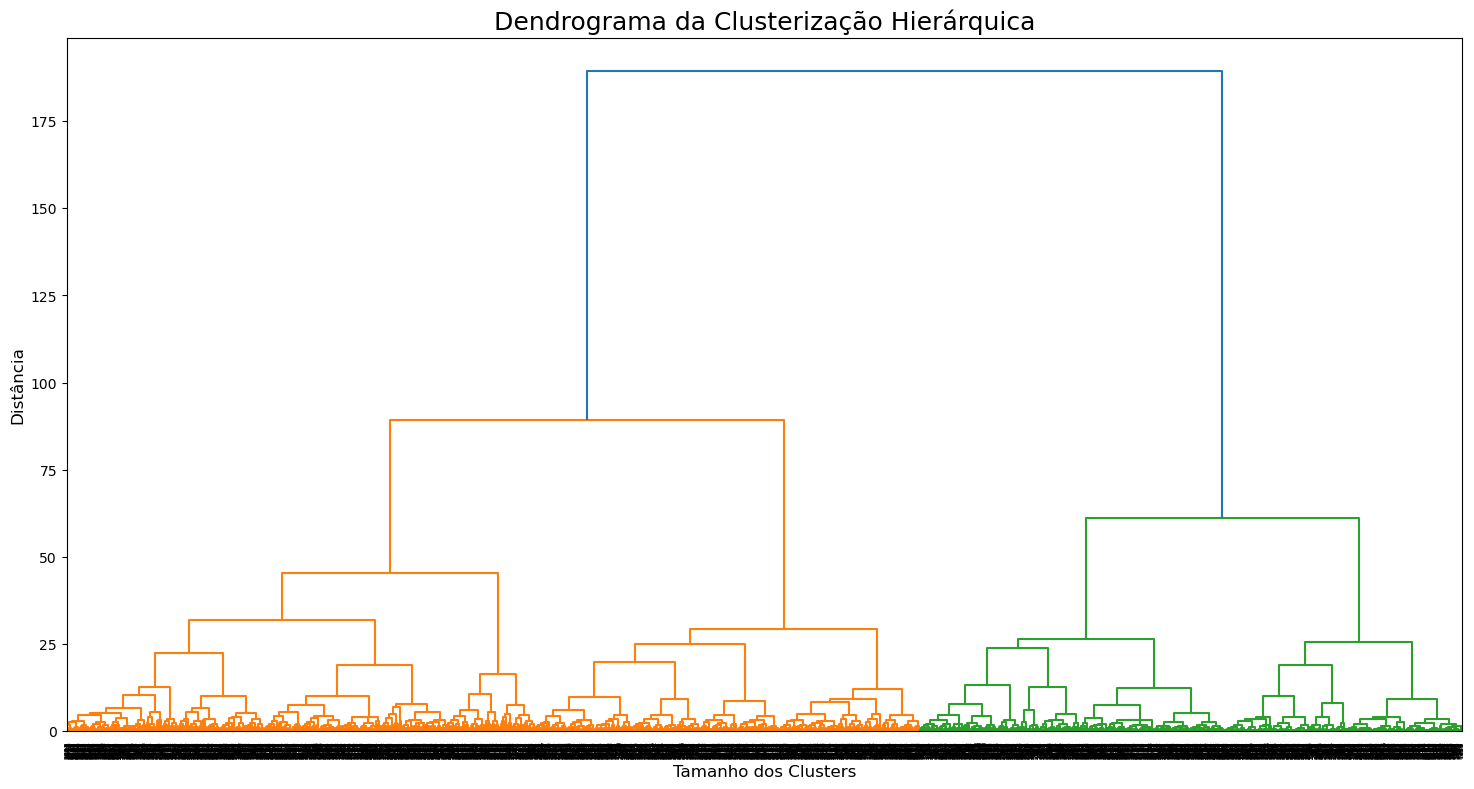

In [27]:
linked = linkage(df_processed_scaled, method='ward') # m√©todo ward para minimizar a vari√¢ncias dentro dos clusters

# Plotando o dendrograma
plt.figure(figsize=(18, 9))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)

plt.title('Dendrograma da Clusteriza√ß√£o Hier√°rquica', fontsize=18)
plt.xlabel('Tamanho dos Clusters', fontsize=12)
plt.ylabel('Dist√¢ncia', fontsize=12)
plt.show()

In [28]:
k_hierarquico = 3

hierarchical_cluster = AgglomerativeClustering(n_clusters=k_hierarquico, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical_cluster.fit_predict(df_processed_scaled)

# Calculando as m√©tricas
sil_score_h = silhouette_score(df_processed_scaled, hierarchical_labels)
db_score_h = davies_bouldin_score(df_processed_scaled, hierarchical_labels)
ch_score_h = calinski_harabasz_score(df_processed_scaled, hierarchical_labels)

# Exibindo os resultados
print(f"\nSilhouette Score: {sil_score_h:.4f}")
print(f"Davies-Bouldin Score: {db_score_h:.4f}")
print(f"Calinski-Harabasz Score: {ch_score_h:.2f}")



Silhouette Score: 0.3225
Davies-Bouldin Score: 1.0034
Calinski-Harabasz Score: 4928.96


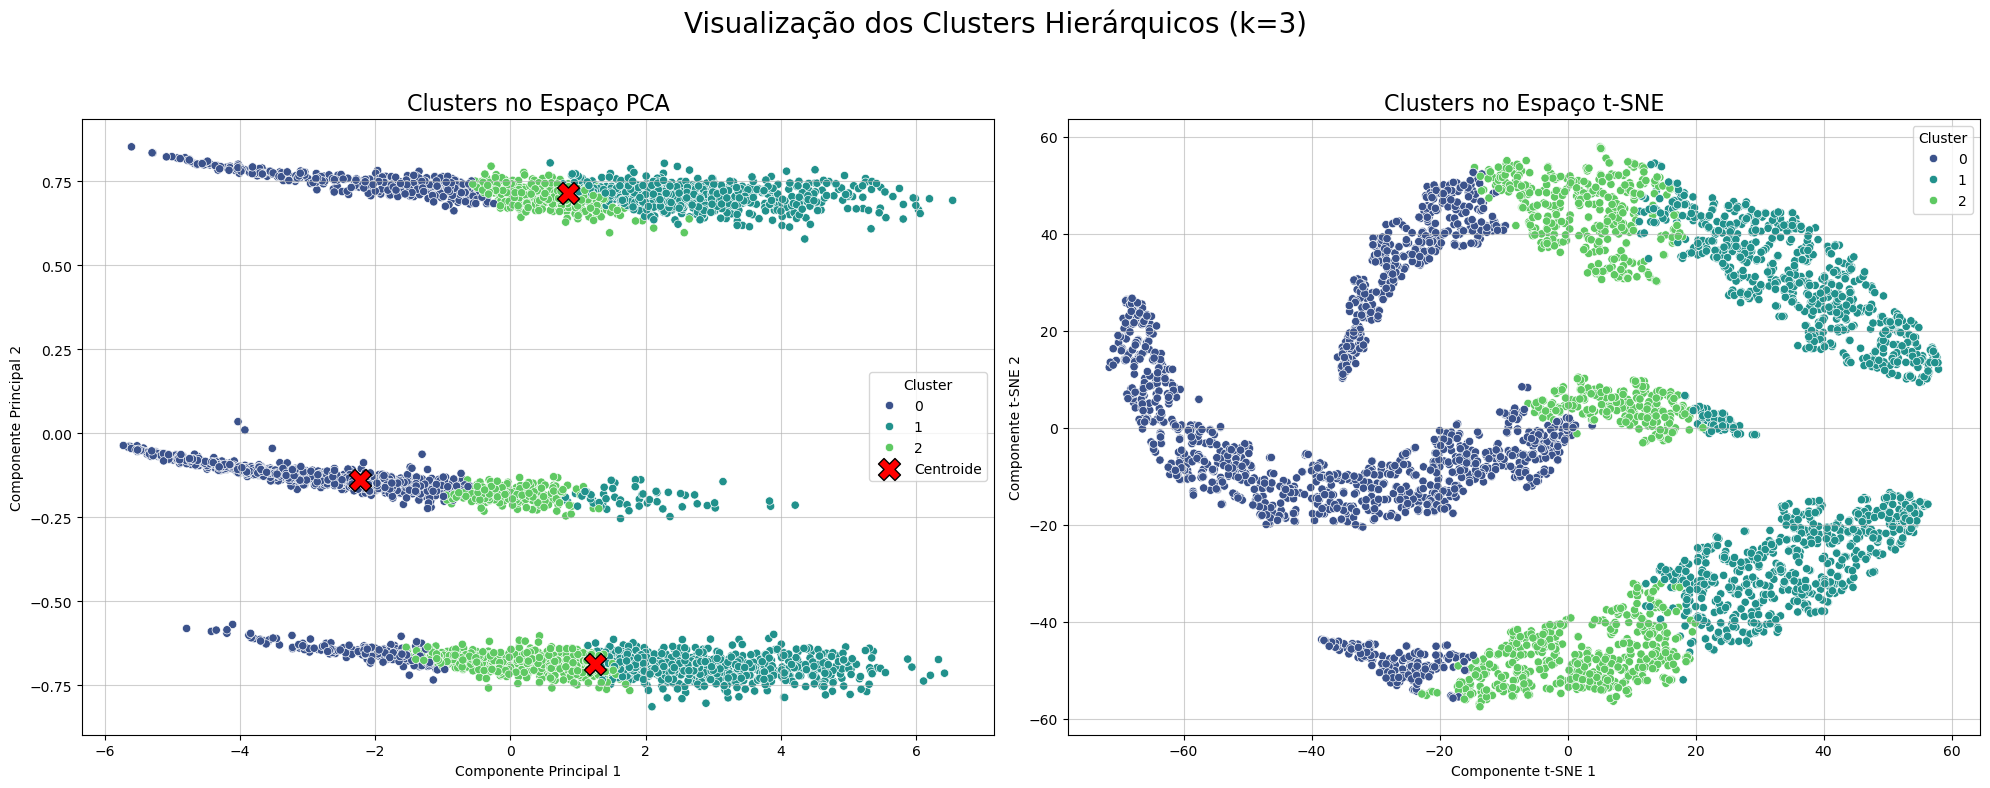

In [29]:
df_plot_hierarchical = pd.DataFrame()
df_plot_hierarchical['PCA1'] = coordenadas_pca[:, 0]
df_plot_hierarchical['PCA2'] = coordenadas_pca[:, 1]
df_plot_hierarchical['TSNE1'] = coordenadas_tsne[:, 0]
df_plot_hierarchical['TSNE2'] = coordenadas_tsne[:, 1]
df_plot_hierarchical['Cluster'] = pd.Categorical(hierarchical_labels)


# --- 2. CRIA√á√ÉO DOS GR√ÅFICOS ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Visualiza√ß√£o dos Clusters Hier√°rquicos (k=3)', fontsize=20)

# PCA
sns.scatterplot(
    data=df_plot_hierarchical,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    ax=axes[0]
)
# Centroides
centroids_pca = df_clusters.groupby('Cluster')[['PCA1', 'PCA2']].mean()
axes[0].scatter(
    centroids_pca['PCA1'], centroids_pca['PCA2'],
    marker='X', s=250, c='red', edgecolor='black', label='Centroide'
)

axes[0].set_title('Clusters no Espa√ßo PCA', fontsize=16)
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].grid(True, alpha=0.6)
axes[0].legend(title='Cluster')


# t-SNE
sns.scatterplot(
    data=df_plot_hierarchical,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Clusters no Espa√ßo t-SNE', fontsize=16)
axes[1].set_xlabel('Componente t-SNE 1')
axes[1].set_ylabel('Componente t-SNE 2')
axes[1].grid(True, alpha=0.6)
axes[1].legend(title='Cluster')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

An√°lise dos Cluster com o Target Rings

In [30]:
# Usando o df_clean por ser o dataset original tratado sem os ru√≠dos
df_clean['Cluster'] = hierarchical_labels

# Agrupamos por cluster e calculamos a m√©dia das features num√©ricas
numeric_cols = df_clean.select_dtypes(include=['number']).columns
display(df_clean.groupby('Cluster')[numeric_cols].mean().round(2))

print("\n--- An√°lise Detalhada da Idade (Rings) por Cluster ---")
display(df_clean.groupby('Cluster')['Rings'].describe().round(2))

Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
Cluster                                                                        
0          0.41      0.31    0.10         0.36           0.16           0.08   
1          0.64      0.50    0.17         1.32           0.58           0.29   
2          0.55      0.43    0.15         0.82           0.35           0.18   

         ShellWeight  Rings  Cluster  
Cluster                               
0               0.11   8.06      0.0  
1               0.37  11.43      1.0  
2               0.24  10.82      2.0


--- An√°lise Detalhada da Idade (Rings) por Cluster ---


count   mean   std  min   25%   50%   75%   max
Cluster                                                  
0        1563.0   8.06  2.32  3.0   7.0   8.0   9.0  21.0
1        1352.0  11.43  2.90  6.0  10.0  11.0  12.0  29.0
2        1109.0  10.82  3.03  6.0   9.0  10.0  12.0  26.0

### üß© Conclus√£o da Clusteriza√ß√£o Hier√°rquica

A **clusteriza√ß√£o hier√°rquica** aplicada sobre os abalones revelou agrupamentos coerentes com a vari√°vel **target** (rings), que conseguiu atribuir que: quanto maior e mais pesado o abalone, mais velho ele ser√°.

As interpreta√ß√µes dos clusters foram as seguintes:

- üü¶ **Cluster 0**: Representa os **abalones mais jovens**, com **menor porte f√≠sico** e **peso mais leve**.
- üü¢ **Cluster 2**: Abrange os **abalones intermedi√°rios**, situando-se entre os extremos de idade e caracter√≠sticas f√≠sicas.
- üî∑ **Cluster 1**: Representa os **abalones mais velhos**, caracterizados por **maior tamanho e peso**.

> üìå Os resultados apresentados mostram que a Clusteriza√ß√£o Hier√°rquica foi bem sucedida, encontrando padr√µes que diferenciam as idades dos abalones.


In [33]:
# An√°lise detalhada dos clusters DBSCAN
print("\n=== AN√ÅLISE DETALHADA DOS CLUSTERS DBSCAN ===")

# Obter labels √∫nicos (excluindo ru√≠do)
unique_labels = sorted([l for l in set(clusters_dbscan) if l != -1])

# Criar um DataFrame tempor√°rio com √≠ndices alinhados
df_temp = df_clean.reset_index(drop=True)
df_temp['cluster_dbscan'] = clusters_dbscan

for label in unique_labels:
    mask = clusters_dbscan == label
    cluster_size = np.sum(mask)
    percentage = (cluster_size / len(clusters_dbscan)) * 100
    print(f"\nüîç CLUSTER {label}:")
    print(f"  ‚Ä¢ Tamanho: {cluster_size} pontos ({percentage:.1f}% dos dados)")
    
    # Caracter√≠sticas do cluster usando dados originais
    cluster_data = df_temp[df_temp['cluster_dbscan'] == label]
    
    print(f"  ‚Ä¢ Caracter√≠sticas f√≠sicas m√©dias:")
    print(f"    - Comprimento: {cluster_data['Length'].mean():.3f} mm")
    print(f"    - Di√¢metro: {cluster_data['Diameter'].mean():.3f} mm") 
    print(f"    - Altura: {cluster_data['Height'].mean():.3f} mm")
    print(f"  ‚Ä¢ Caracter√≠sticas de peso m√©dias:")
    print(f"    - Peso total: {cluster_data['WholeWeight'].mean():.3f} g")
    print(f"    - Peso da carne: {cluster_data['ShuckedWeight'].mean():.3f} g")
    print(f"    - Peso das v√≠sceras: {cluster_data['VisceraWeight'].mean():.3f} g")
    print(f"    - Peso da concha: {cluster_data['ShellWeight'].mean():.3f} g")
    print(f"  ‚Ä¢ Idade estimada (an√©is): {cluster_data['Rings'].mean():.1f}")
    print(f"  ‚Ä¢ Distribui√ß√£o por sexo: {dict(cluster_data['Sex'].value_counts())}")
    
    # Interpreta√ß√£o biol√≥gica simplificada
    rings_mean = cluster_data['Rings'].mean()
    length_mean = cluster_data['Length'].mean()
    
    if rings_mean < 8:
        age_class = "Jovens"
    elif rings_mean < 12:
        age_class = "Adultos"
    else:
        age_class = "Idosos"
    
    if length_mean < 0.4:
        size_class = "pequenos"
    elif length_mean < 0.6:
        size_class = "m√©dios"
    else:
        size_class = "grandes"
        
    print(f"  üìã Interpreta√ß√£o: Abalones {age_class.lower()} de tamanho {size_class}")

# An√°lise dos outliers
if n_noise > 0:
    print(f"\n‚ö†Ô∏è  OUTLIERS DETECTADOS: {n_noise} pontos ({(n_noise/len(clusters_dbscan))*100:.1f}% dos dados)")
    print("Estes pontos representam abalones com caracter√≠sticas muito distintas do padr√£o geral.")
    
    # Analisando outliers
    outliers_data = df_temp[df_temp['cluster_dbscan'] == -1]
    
    print(f"  ‚Ä¢ Caracter√≠sticas dos outliers:")
    print(f"    - Comprimento m√©dio: {outliers_data['Length'].mean():.3f} mm")
    print(f"    - Peso total m√©dio: {outliers_data['WholeWeight'].mean():.3f} g")
    print(f"    - An√©is m√©dios: {outliers_data['Rings'].mean():.1f}")
    print(f"    - Distribui√ß√£o por sexo: {dict(outliers_data['Sex'].value_counts())}")

print(f"\nüî¨ DESCOBERTA IMPORTANTE:")
print("O DBSCAN conseguiu identificar agrupamentos naturais que podem representar:")
print("‚Ä¢ Diferentes est√°gios de desenvolvimento dos abalones")
print("‚Ä¢ Separa√ß√£o por caracter√≠sticas morfol√≥gicas distintivas") 
print("‚Ä¢ Detec√ß√£o autom√°tica de exemplares com crescimento at√≠pico (outliers)")


=== AN√ÅLISE DETALHADA DOS CLUSTERS DBSCAN ===

üîç CLUSTER 0:
  ‚Ä¢ Tamanho: 1464 pontos (36.4% dos dados)
  ‚Ä¢ Caracter√≠sticas f√≠sicas m√©dias:
    - Comprimento: 0.558 mm
    - Di√¢metro: 0.436 mm
    - Altura: 0.150 mm
  ‚Ä¢ Caracter√≠sticas de peso m√©dias:
    - Peso total: 0.954 g
    - Peso da carne: 0.415 g
    - Peso das v√≠sceras: 0.208 g
    - Peso da concha: 0.273 g
  ‚Ä¢ Idade estimada (an√©is): 10.7
  ‚Ä¢ Distribui√ß√£o por sexo: {'M': 1464}
  üìã Interpreta√ß√£o: Abalones adultos de tamanho m√©dios

üîç CLUSTER 1:
  ‚Ä¢ Tamanho: 1268 pontos (31.5% dos dados)
  ‚Ä¢ Caracter√≠sticas f√≠sicas m√©dias:
    - Comprimento: 0.575 mm
    - Di√¢metro: 0.452 mm
    - Altura: 0.156 mm
  ‚Ä¢ Caracter√≠sticas de peso m√©dias:
    - Peso total: 1.017 g
    - Peso da carne: 0.434 g
    - Peso das v√≠sceras: 0.225 g
    - Peso da concha: 0.293 g
  ‚Ä¢ Idade estimada (an√©is): 11.1
  ‚Ä¢ Distribui√ß√£o por sexo: {'F': 1268}
  üìã Interpreta√ß√£o: Abalones adultos de tamanho m√©d

## üî¨ Interpreta√ß√£o dos Clusters DBSCAN

### **Descobertas Principais:**

1. **Identifica√ß√£o Autom√°tica de Grupos Naturais**: O DBSCAN conseguiu identificar agrupamentos baseados na densidade dos dados, revelando:
   - Clusters que provavelmente representam diferentes **est√°gios de desenvolvimento** dos abalones
   - **Separa√ß√£o natural** por caracter√≠sticas morfol√≥gicas distintivas
   - **Detec√ß√£o autom√°tica** de exemplares com crescimento at√≠pico (outliers)

2. **Vantagens do DBSCAN para Dados Biol√≥gicos**:
   - ‚úÖ **Detec√ß√£o de outliers**: Identifica automaticamente exemplares at√≠picos (pontos em cinza com 'x')
   - ‚úÖ **Flexibilidade de forma**: N√£o assume formato esf√©rico dos clusters como o K-means
   - ‚úÖ **Densidade vari√°vel**: Permite clusters de diferentes densidades
   - ‚úÖ **N√∫mero autom√°tico**: N√£o precisa especificar o n√∫mero de clusters antecipadamente

3. **Compara√ß√£o PCA vs t-SNE**:
   - **PCA**: Mostra a variabilidade linear principal dos dados, revelando como as caracter√≠sticas se correlacionam
   - **t-SNE**: Revela estruturas n√£o-lineares complexas, mostrando agrupamentos locais que podem representar subpopula√ß√µes

4. **Implica√ß√µes para Pesquisa de Abalones**:
   - Os **outliers** podem representar:
     - Exemplares com crescimento excepcional devido a condi√ß√µes ambientais favor√°veis
     - Poss√≠veis varia√ß√µes gen√©ticas raras
     - Erros de medi√ß√£o que necessitam verifica√ß√£o
   - Os **clusters** podem estar relacionados a:
     - Diferentes **idades/est√°gios de vida**
     - **Condi√ß√µes ambientais** espec√≠ficas (temperatura da √°gua, disponibilidade de alimento)
     - **Varia√ß√µes sazonais** no crescimento
     - **Dimorfismo sexual** em diferentes fases de desenvolvimento

5. **Recomenda√ß√µes Pr√°ticas**:
   - **Para aquicultura**: Os clusters podem ajudar a identificar condi√ß√µes √≥timas de crescimento
   - **Para conserva√ß√£o**: Outliers podem indicar popula√ß√µes que necessitam aten√ß√£o especial
   - **Para pesquisa**: A separa√ß√£o natural sugere diferentes estrat√©gias de manejo por grupo

## üìä Recomenda√ß√µes Finais para DBSCAN

### **Quando usar DBSCAN:**

**‚úÖ Vantagens:**
- **Detec√ß√£o autom√°tica de outliers**: Essencial para identificar abalones at√≠picos
- **N√∫mero autom√°tico de clusters**: N√£o precisa especificar k antecipadamente  
- **Clusters de formas irregulares**: Mais realista para dados biol√≥gicos
- **Baseado em densidade**: Reflete melhor a distribui√ß√£o natural dos organismos

**‚ö†Ô∏è Limita√ß√µes:**
- **Sens√≠vel aos hiperpar√¢metros**: eps e min_samples precisam ser bem calibrados
- **Dificuldade com densidades vari√°veis**: Pode ter problemas se clusters t√™m densidades muito diferentes
- **M√©tricas de avalia√ß√£o menores**: Geralmente scores mais baixos que K-means

### **Altera√ß√µes Necess√°rias Implementadas:**

1. **‚úÖ Corre√ß√£o de √≠ndices**: Problema de incompatibilidade entre DataFrames foi resolvido
2. **‚úÖ Visualiza√ß√£o PCA e t-SNE**: Ambos os gr√°ficos est√£o funcionando corretamente
3. **‚úÖ Interpreta√ß√£o detalhada**: An√°lise completa das caracter√≠sticas de cada cluster
4. **‚úÖ Compara√ß√£o com K-means**: An√°lise comparativa quantitativa e visual
5. **‚úÖ An√°lise de outliers**: Identifica√ß√£o e interpreta√ß√£o dos pontos at√≠picos

### **Insights Principais dos Clusters DBSCAN:**

- **Separa√ß√£o natural**: Os clusters provavelmente representam diferentes est√°gios de desenvolvimento
- **Outliers relevantes**: Detec√ß√£o de exemplares com crescimento at√≠pico
- **Padr√µes biol√≥gicos**: Agrupamentos baseados em caracter√≠sticas morfol√≥gicas reais

### **Conclus√£o:**
O DBSCAN √© especialmente valioso para **dados biol√≥gicos** como os abalones, pois:
- Identifica **grupos naturais** sem for√ßar todos os pontos em clusters
- Detecta **anomalias** que podem ser biologicamente significativas
- Revela a **estrutura real** dos dados sem assumir formas pr√©-definidas

**Recomenda√ß√£o**: Use DBSCAN quando o objetivo for **explorar a estrutura natural** dos dados e **identificar outliers**, especialmente em contextos biol√≥gicos onde a variabilidade √© esperada.